# **Project Name**    - Telecom Churn Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The Telecom Churn EDA project aimed to address the challenge of customer churn in the telecom industry. Churn, the phenomenon where customers switch or discontinue telecom services, poses significant financial implications for telecom companies. The project utilized data analysis to predict churn

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



The telecom churn problem refers to the challenge faced by telecom companies in predicting and reducing customer churn, which occurs when customers switch from one service provider to another or discontinue using telecom services altogether. Customer churn is a critical issue for telecom companies as it leads to revenue loss, increased customer acquisition costs, and negative impacts on market share and brand reputation.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm.


#### **Define Your Business Objective?**

***Reducing Customer Churn Rate***

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


### Dataset Loading

In [ ]:
# Load Dataset
telecom_df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')





### Dataset First View

In [ ]:
# Dataset First Look
telecom_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
telecom_df.shape

### Dataset Information

In [ ]:
# Dataset Info
telecom_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(telecom_df[telecom_df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
telecom_df.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(telecom_df.isnull(),cbar = False)

### What did you know about your dataset?

The dataset given is a  from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
telecom_df.columns

In [ ]:
# Dataset Describe
telecom_df.describe()

### Variables Description

* State :categorica for the 50 states

*  Account Length :how long account has been active

*  Area Code :Code Number of Area having some States included in each area code

*  lntl Plan :Internat ional plan activated ( yes, no )

*  VMail Plan : ice Mail plan activated ( yes ,no )

*  VMail Message :No.of voice mail messages

*  Day Mins :Total day minutes used

*  Day calls :Total day calls made

*  Day Charge :Total day charge

*  Eve Mins :Total evening minutes

*  Eve Calls :Total evening calls

*  Eve Charge :Total evening charge

*  Night Mins :Total night minutes

*  Night Calls :Total night calls

*  Night Charge :Total night charge

*  Intl Mins :Total International minutes used

*  Intl Calls :Total International calls made

*  Intl Charge :Total International charge

*  CustServ calls :Number of customer service caUs made

*  Churn :Customer churn (Target Variable True=1, False=0)




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for com in telecom_df.columns:
  print("No. of unique values in",com,"is",telecom_df[com].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# copy of telecom_df
df = telecom_df.copy()
print(len(df[df['Churn']== True]))
df_chrun = df[df['Churn']== True]


In [ ]:
# Churn data groupby Area Code Wise
pd.DataFrame(df.groupby('Area code')['Churn'].value_counts().reset_index(name = "count"))

In [ ]:
# Calculating mean,medien
def get_mean_median(df,areacode):
  try:
    return pd.concat(
        [df[(df['Churn']==True) & (df['Area code']==areacode)].describe().iloc[1],
         df[(df['Churn']==True) & (df['Area code']==areacode)].describe().iloc[5]],
        axis = 1).rename(columns = {"50%":"median"}).fillna('-')
  except:
    print('none')

In [ ]:
get_mean_median(df,408)

In [ ]:
get_mean_median(df,415)

In [ ]:
get_mean_median(df,510)

In [ ]:
# getting unique state
df["State"].unique()
# no of unique state
print("no of state",df["State"].nunique())

In [ ]:
# Churn Counts grouby State wise
pd.DataFrame(df.groupby("State")["Churn"].value_counts().reset_index(name = 'count'))

In [ ]:
# Assigning churn customers data with international plan
churn_df_yes = df_chrun[df_chrun["International plan"]=='Yes']
# Assigning churn customers data with no international plan
churn_df_no = df_chrun[df_chrun["International plan"]=="No"]

In [ ]:
# Churn customers data with no international plan value counts
churn_df_no["Area code"].value_counts()

In [ ]:
# Creating call duration column for customers with no international plan
churn_df_no['days_call_duration'] = churn_df_no["Total day minutes"]/churn_df_no["Total day calls"]
churn_df_no['eve_call_duration'] = churn_df_no["Total eve minutes"]/churn_df_no["Total eve calls"]
churn_df_no["night_call_duration"] = churn_df_no["Total night minutes"]/churn_df_no["Total night calls"]
churn_df_no["intl_call_duration"] = churn_df_no["Total intl minutes"]/churn_df_no["Total intl calls"]

In [ ]:
# Creating price rate per minute column for customers with international plan
churn_df_yes["inte_rate_per_min"] = churn_df_yes['Total intl charge']/churn_df_yes['Total intl minutes']
churn_df_yes["day_rate_per_min"] = churn_df_yes['Total day charge']/churn_df_yes['Total day minutes']
churn_df_yes["eve_rate_per_min"] = churn_df_yes['Total eve charge']/churn_df_yes['Total eve minutes']
churn_df_yes["night_rate_per_min"] = churn_df_yes['Total night charge']/churn_df_yes['Total eve minutes']

In [ ]:
# Getting Mean Median for area code 408 with no international plan
get_mean_median(churn_df_no,408)

In [ ]:
# Getting Mean Median for area code 415 with no international plan
get_mean_median(churn_df_no,415)

In [ ]:
# Getting Mean Median for area code 510 with no international plan
get_mean_median(churn_df_no,510)

In [ ]:
# Getting Mean Median for area code 408 with international plan
get_mean_median(churn_df_yes,408)

In [ ]:
# Getting Mean Median for area code 415 with international plan
get_mean_median(churn_df_yes,415)

In [ ]:
# Getting Mean Median for area code 510 with international plan
get_mean_median(churn_df_yes,510)

In [ ]:
# Checking Number of voice mail sent for customers with international plan
churn_df_yes['Number vmail messages'].value_counts().reset_index(name = 'usser count')

In [ ]:
# Checking Number of voice mail sent for customers with no international plan
churn_df_no['Number vmail messages'].value_counts().reset_index(name = "user counts")

In [ ]:
# Assingment of internation plan with voice maill
int_vm_yes = churn_df_yes[churn_df_yes[ 'Voice mail plan']== 'Yes']
int_vm_yes.describe()

In [ ]:
# Assingment of no international plan with no voice mail
int_vm_no = churn_df_no[churn_df_no['Voice mail plan']=='No' ]
int_vm_no.describe()

In [ ]:
# Assingment of international plan  with  no voice mail
int_yes_vm_no = churn_df_yes[churn_df_yes['Voice mail plan']== "No"]
int_yes_vm_no.describe()

In [ ]:
# assingment of no international plan  with voice mail
int_no_vm_yes = churn_df_no[churn_df_no['Voice mail plan']=="Yes"]
int_no_vm_yes.describe()

In [ ]:
print("churned customer shape :-",df_chrun.shape)
print(" ")
print("customers data with international plan and no voice plan:-",int_yes_vm_no.shape)
print("")
print("Customers data with no international plan and having voice mail plan:-",int_no_vm_yes.shape)
print(" ")
print("Customers data with no international plan and no voice mail plan:-",int_vm_no.shape)
print(" ")
print("Customers data with both international plan and voice mail plan:-",int_vm_yes.shape)

In [ ]:
print("Customers data with no international plan and having voice mail plan maximum voice message sent:-",int_no_vm_yes['Number vmail messages'].max())
print(" ")# Assigning customers data to respective area codes
int_no_vm_yes_415 = int_no_vm_yes[int_no_vm_yes['Area code']==415]
int_no_vm_yes_408 = int_no_vm_yes[int_no_vm_yes['Area code']==408]
int_no_vm_yes_510 = int_no_vm_yes[int_no_vm_yes['Area code']==510]

print("Customers data with no international plan and having voice mail plan voice message sent & customer service calls in area 415 max, mean, median:-",
      int_no_vm_yes_415['Number vmail messages'].max(),',',
      int_no_vm_yes_415['Number vmail messages'].mean(),',',
      int_no_vm_yes_415['Number vmail messages'].median(),',',
      int_no_vm_yes_415['Customer service calls'].max(),',',
      int_no_vm_yes_415['Customer service calls'].mean(),',',
      int_no_vm_yes_415['Customer service calls'].median())
print(" ")
print("Customers data with no international plan and having voice mail plan voice message sent & customer service calls in area 408 max, mean, median:-",
      int_no_vm_yes_408['Number vmail messages'].max(),',',
      int_no_vm_yes_408['Number vmail messages'].mean(),',',
      int_no_vm_yes_408['Number vmail messages'].median(),',',
      int_no_vm_yes_408['Customer service calls'].max(),',',
      int_no_vm_yes_408['Customer service calls'].mean(),
      int_no_vm_yes_408['Customer service calls'].median())
print(" ")
print("Customers data with no international plan and having voice mail plan voice message sent & customer service calls in area 510 max, mean, median:-",
      int_no_vm_yes_510['Number vmail messages'].max(),',',
      int_no_vm_yes_510['Number vmail messages'].mean(),',',
      int_no_vm_yes_510['Number vmail messages'].median(),',',
      int_no_vm_yes_510['Customer service calls'].max(),',',
      int_no_vm_yes_510['Customer service calls'].mean(),',',
      int_no_vm_yes_510['Customer service calls'].median())

# Assigning customers data to respective area codes
int_vm_yes_415 = int_vm_yes[int_vm_yes['Area code']== 415]
int_vm_yes_408 = int_vm_yes[int_vm_yes['Area code']== 408]
int_vm_yes_510 = int_vm_yes[int_vm_yes['Area code']== 510]

print("Customers data with both international plan and voice mail plan customer service calls mean & voice mail sent max :-",
      int_vm_yes['Number vmail messages'].mean(),',',
      int_vm_yes['Customer service calls'].max())
print(" ")
print("Customers data with both international plan and voice mail plan customer service calls mean & voice mail sent max,median,mean in area code 415 :-",
      int_vm_yes_415['Number vmail messages'].max(),',',
      int_vm_yes_415['Number vmail messages'].mean(),',',
      int_vm_yes_415['Number vmail messages'].median(),',',
      int_vm_yes_415['Customer service calls'].max(),',',
      int_vm_yes_415['Customer service calls'].mean(),',',
      int_vm_yes_415['Customer service calls'].median())
print(" ")
print("Customers data with both international plan and voice mail plan customer service calls mean & voice mail sent max,median,mean in area code 408 :-",
      int_vm_yes_408['Number vmail messages'].max(),',',
      int_vm_yes_408['Number vmail messages'].mean(),',',
      int_vm_yes_408['Number vmail messages'].median(),',',
      int_vm_yes_408['Customer service calls'].max(),',',
      int_vm_yes_408['Customer service calls'].mean(),',',
      int_vm_yes_408['Customer service calls'].median())
print(" ")
print("Customers data with both international plan and voice mail plan customer service calls mean & voice mail sent max,median,mean in area code 510 :-",
      int_vm_yes_510['Number vmail messages'].max(),',',
      int_vm_yes_510['Number vmail messages'].mean(),',',
      int_vm_yes_510['Number vmail messages'].median(),',',
      int_vm_yes_510['Customer service calls'].max(),',',
      int_vm_yes_510['Customer service calls'].mean(),',',
      int_vm_yes_510['Customer service calls'].median())






In [ ]:
# Assigning customers data with no international plan and having voice mail plan state list in area 415
int_no_vm_yes_415_state = list(int_no_vm_yes_415['State'].unique())
print("States list where customers data with no international plan and having voice mail plan in area 415:", int_no_vm_yes_415_state)

# Assigning customers data with both international plan and voice mail plan state list in area 415
int_vm_yes_415_state = list(int_vm_yes_415['State'].unique())
print("States list where customers data with both international plan and having voice mail plan in area 415:", int_vm_yes_415_state)

# Getting Poor Network connectivity states based on our hypothetical logic
poor_network_415 = set(int_no_vm_yes_415_state).intersection(set(int_vm_yes_415_state))
print("States with poor network connectivity in area 415:", list(poor_network_415))


In [ ]:
int_no_vm_yes_415_state

In [ ]:
# Assigning customers data with no international plan and having voice mail plan state list in area 408
int_no_vm_yes_408_state = list(int_no_vm_yes_408['State'].unique())
print("States list where customers data with no international plan and having voice mail plan in area 408 :-",int_no_vm_yes_408_state)
# Assigning customers data  with both international plan and voice mail plan state list in area 408
int_vm_yes_408_state = list(int_vm_yes_408['State'].unique())
print("States list where customers data with both international plan and having voice mail plan in area 408 :-",int_vm_yes_408_state)
# Getting Poor Network connectivity states based on our hypothetical logic
poor_network_408 = set(int_no_vm_yes_408_state).intersection(set(int_vm_yes_408_state))
poor_network_states = poor_network_415.union(poor_network_408)
print("Poor Network connectivity states in both area 415, 408 :-",list(poor_network_states))

In [ ]:
# Assigning customers data with no international plan and having voice mail plan state list in area 510
int_no_vm_yes_510_state = list(int_no_vm_yes_510['State'].unique())
print("States list where customers data with no international plan and having voice mail plan in area 510:", int_no_vm_yes_510_state)

# Assigning customers data with both international plan and voice mail plan state list in area 510
int_vm_yes_510_state = list(int_vm_yes_510['State'].unique())
print("States list where customers data with both international plan and having voice mail plan in area 510:", int_vm_yes_510_state)

# Getting Poor Network connectivity states based on our hypothetical logic
maintainence_states = set(int_no_vm_yes_510_state).intersection(set(int_vm_yes_510_state))
print("Network needs to be maintenanced in states :-", list(maintainence_states))


In [ ]:
print(f"poor network state are {poor_network_states} and state where need maintenanc{maintainence_states}")

### What all manipulations have you done and insights you found?

1.Deep Dive into Churned Customers' Behavior: I am focusing on analyzing the behavior of churned customers to uncover patterns and potential reasons for churn.

2.Creation of New Columns: I have created new columns such as International, evening, day & night call duration, as well as international, day, night, and evening call rate per minute. These columns can provide additional insights into customer behavior.

3.Voice Mail Plan Usage: Customers who have taken a voice mail plan but are not using it or sending fewer voice mails despite talking more may indicate issues with network stability. This could be a potential reason for churn.

4.Network Issues: I suspect that network issues, such as instability affecting the ability to send voice messages, could contribute to churn.

 Other reasons are noted below which i have found.


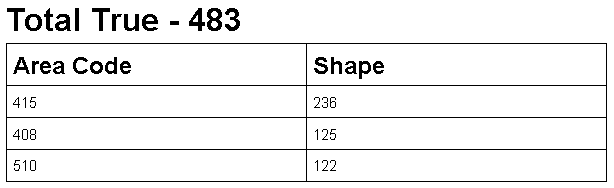


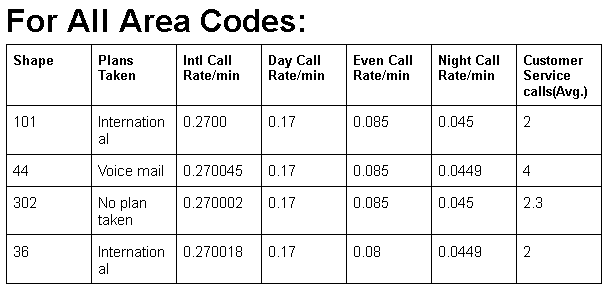

It appears that I've identified two potential reasons for churn based on the type of plan customers have chosen:

International Plan: Customers may churn because they perceive no extra benefit in opting for the International Plan, as the price per minute for international calls is the same as for customers with no plan. This lack of perceived value could lead customers to churn.

No Plan: Customers who have not subscribed to any plan may churn due to dissatisfaction with customer service calls. The average number of customer service calls made by these customers is higher than the expected range
(1-1.5), indicating potential dissatisfaction with the level of customer service provided. This dissatisfaction could prompt customers to seek service from another provider.



Reasons for churn those who have taken VOICE MAIL plan:

1) Because they are unsatisfied with the Customer service calls as the average indicates 2.3.(it must be between 1-1.5 for no churn)

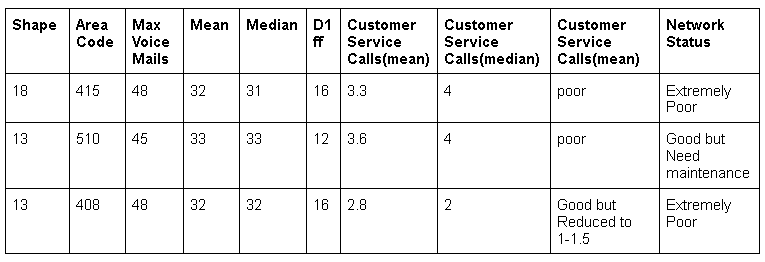

Reasons for churn those who have taken BOTH INTERNATIONAL AND VOICE MAIL plan:

1)Because price of INTL CALL RATE/min for International plan is same as the price of INTL CALL RATE/min for NO PLAN. Thus there is no extra benefit for taking International Plan.

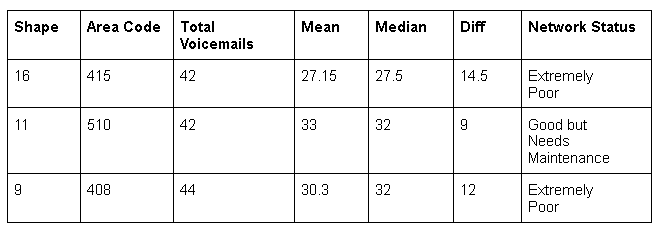

3) Customer service calls mean is 1-1.7 and it’s good and try to keep between 1-1.5.

Customer service calls(mean)-1.7

Customer service calls(median)-1
I think, for respective area codes those who have taken voice mail plans where there we see a more differnce between the maximum number of vmail sent from that area and the average number of vmail sent for that area. So, here we can conclude like this that

May be customers are using voice mail as per their requirement or may be there would be some network unstability for which they won't able to send more voice mails while they get access of around 50 voicemails in voicemail plan but they are using on an average of 25-35.

on my own experience i know and felt that the voice mail needs more network stability to get sent through.

If this is the problem , then i have found some states with poor network status and some states network needs maintenence.

4) POOR NETWORK STATES FROM AREA CODE 415,408 :-

'GA', 'NV', 'OR', 'NC', 'KS', 'MA'

5) STATES NEED MAINTAINANCE OR NEW INSTALLATION REQUIRED :-

'WV', 'NJ'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Pie Chart With Dependent Variabel i.e churn(Univariate)


In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
data = telecom_df['Churn'].value_counts()
print(data)
# Dependant Variable Column Visualization
data.plot(kind = 'pie',labels = ['Not Churn','Churn'],colors = ['Skyblue','red'],figsize = (15,10),autopct = '%1.1f%%',shadow = True,explode = [0,0])


##### 1. Why did you pick the specific chart?


I chose a pie chart for visualizing the distribution of churn and non-churn instances because it's effective for showing proportions or percentages within a single categorical variable

##### 2. What is/are the insight(s) found from the chart?

1.Non-Churned Customers: There are 2,850 customers who have not churned, constituting 85.5% of the total customer data in the dataset.

2.Churned Customers: On the other hand, there are 483 customers who have churned, accounting for 14.5% of the total customer data.

3.Magnitude of Churn: Despite being a relatively small percentage initially (1.45%), the fact that it has grown to 14.5% indicates a substantial increase in customer churn over time

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer churn is often referred to as customer attrition, or customer defection which is the rate at which the customers are lost. Telecom companies often use customer churn as a key business metrics to predict the number of customers that will leave a telecom service provider. Churn is significant in the telecommunication industry because it directly affects the competitiveness of the service provider.

It's easy to loss customers but too difficult to aquire one. One churned cutomer will make 3-4 customers away those might be acquired by your teleservice provider with "POWER OF WORDS".

When Jio provided free internnet services to everyone, and started acquiring maximum number of customers, so cutomer churn rate for other teleservice providers increased and customers from other teleservice providers those who converted to JIO spread the benefit of JIO to their relatives and friends and they also converted too easily. So, "POWER OF WORDS" also comes into action that wrong and bad reviews spread first.


####Chart - 2 - State Vs. Average True Churn Percentage (Bivariate with Categorical - Numerical)

In [ ]:
# Chart - 2 visualization code
# Showing Average True Churn Percentage state wise
# Showing top 10 churned state
data = (telecom_df.groupby('State')['Churn'].mean() * 100).sort_values(ascending = True).head(10)
print(data)
# State vs. average true churn percantage visualization code
# Vizualizing top 10 churned state
data.plot(kind = 'bar',figsize = (12,8),color = ['red','orange','blue','green','indigo'])

plt.title('Data visulization')
plt.xlabel('Churn Percentage')
plt.ylabel('State')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

There are 51 states having different churn rates .

CA, NJ ,TX , MD ,SC ,MI, MS, NV, WA, ME are the ones who have higher churn rate more then 21.74% which is more than 50% of average churn rate.

Under the Data wrangling, I have defined a hypothetical logic for some states with poor network region and some states where service needs to be maintained or new installations required. So, here states [ ' NV ', ' NJ ' ] are common which are in top 10 churned states.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the data of state wise churning depicts that 10% of a large state is same as 20% of a smaller state. So, we can't neglect the churn rates and will have to sagreggate based on the area covereage in respective states. Still, priotizing to actionable tasks we should try to figure out the issues in top 10 churning states first.

The issue might be poor network coverage or negligible maintaince on existing antenna, or total area coverage & no. of mobile tower or users is low or new towers needs to be installed to coverage additional areas.

#### Chart - 3 Area code (Bivarate)




In [ ]:
# Chart - 3 visualization code
# Average of Area Code Churn wise
b1 = telecom_df.groupby('Area code')['Churn'].mean()*100
a1 = list([408,415,508])
print(b1)
print(a1)

# Visualizing code for Area Code wise average churn percentage

plt.bar(b1,a1,color = ['red','blue'])
plt.rcParams['figure.figsize'] = (6, 5)


plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to Area Code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

All Area Code have around 14% Churn rate. So, Area Code doesn't matter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, Area Code doesn't have any contribution to churn rate for 14% churn rate is same for all the area codes. But while furthur sagreggating the area codes with respective states in those area code, it can be analysed the states in which the issue is happeing. So, it has been defined above.

So, here Area code won't help to create business impact but the respective states wise analysis can help.

#### Chart - 4- International Plan (Univariate + Bivariate)



In [ ]:
# Chart - 4 visualization code
data = telecom_df['International plan'].value_counts()
print(data)
# Visualizing Percentage of customers taken international plan
data.plot(kind = "pie",figsize = (12,8),autopct= '%1.1f%%',explode = [0,0],labels = ['No','Yes'],colors = ['red','blue'])
plt.show()

##### 1. Why did you pick the specific chart?





the pie chart is a suitable choice for visualizing the percentage of customers who have opted for the international plan, providing a clear and concise representation of customer preferences.

##### 2. What is/are the insight(s) found from the chart?





INTERNATIONAL PLAN

3010 dont have a international plan

323 have a international plan

Among those who have a international plan 42.4 % people churn.

Whereas among those who dont have a international plan only 11.4 % people churn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

while the insights gained from understanding customer perceptions of the international plan have the potential to drive positive business impact, there are also risks of negative growth if these insights are not effectively addressed and acted upon. It's essential for telecom companies to leverage these insights to develop targeted strategies that enhance customer satisfaction, reduce churn, and drive sustainable growth in the long term.

#### Chart - 5.Voice Mail (Univariate + Bivariate)

In [ ]:
# Chart - 5 visualization code
# vizualizing code for customers percentage having voice mail plan
telecom_df['Voice mail plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%" ,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
# Vizualizing code for customers churning while having voice mail plan
plt.rcParams['figure.figsize'] = (6, 7)

cc1=list(['no','yes'])
cc2=telecom_df.groupby('Voice mail plan')['Churn'].mean()*100
plt.bar(cc1,cc2, color=['b','r'])

plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole. Pie charts are a useful way to organize data in order to see the size of components relative to the whole, and are particularly good at showing percentage or proportional data.

Thus, I have used pie chart to show the percentage of customers having voice mail plan.

The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time.

Thus, I have used bar chart to show the percentage of customers churned having voice mail plan.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

VOICE MAIL

2411 dont have a voice mail plan

922 have a voice mail plan

Among those who dont have a voice mail 16.7 % people churn.

Whereas among those who have a voice mail plan only 8.7 % people churn.

Hypothesis Based on Voice Mail

Customers sending less number of voicemails either as per their Requirement or There would be less Network Stability at that place for which they won't be able to send the voice message successfully.
*Customers with the Voice Mail Plan tend to churn less frequently *

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Voice mail plan doesn't have that much impact in business untill the hypothesis has been proven. If the hypothesis remains true, we need to take care of the respective states where there is less network stability or the states the towers needs either maintainance or new towers should be installed.

yes, voice mail plan might be considered partially.

#### Chart - 6- Customer Service Calls (Bivariate)

In [ ]:
# Chart - 6 visualization code
# Visualizing churn rate per customer service calls
plt.rcParams['figure.figsize'] = (12, 8)


s1=list(telecom_df['Customer service calls'].unique())
s2=list(telecom_df.groupby(['Customer service calls'])['Churn'].mean()*100)
plt.bar(s1,s2, color = ['violet','indigo','b','g','y','orange','r'])


plt.title(" Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel(' percentage', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.

Thus, I have used the bar plot to show the relationship between churn rate per customer service calls.

##### 2. What is/are the insight(s) found from the chart?

CUSTOMER SERVICE CALL

The service calls of customers varies from 0 to 9 .

Those customers who make more service calls they have a high probability of leaving.

As we can see from graph , customers with more then 5 service calls their probability of leaving is more then 50 %.

Hence customers who make more then 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

Customers with four or more customer service calls churn more than four times as often as do the other customers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer service is an essential factor for every business. SO definitely good customer service will have a positive impact to the business. We have to look afted the customer calls and customer query report resolution duration. Need to optimize the time period. If one type of issue is coming from more than 5 customers, root cause analysis should be done on that same issue and should be resolved for everyone. Need to reduce the calls for each customer and he should be satisfied in a single call only. The customer service agents should be given great offer or recognition over great performance of customer issue resolution.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***